In [1]:
import pickle
from pathlib import Path
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import seaborn as sns

plt.style.use("seaborn")
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
## Config, copied form results_*/tests.py
n_ants = [10, 20, 33]
alphas = [1, 2, 4, 5]
rhos = [0.05, 0.1, 0.25, 0.3]

<IPython.core.display.Javascript object>

## Read files

In [3]:
FILENAME_33 = Path().resolve() / "results_1586779168" / "save.pkl"
FILENAME_51 = Path().resolve() / "results_1586816093" / "save.pkl"
FILENAME_76 = Path().resolve() / "results_1586816260" / "save.pkl"
with open(FILENAME_33, "rb") as f:
    d_33 = pickle.load(f)
with open(FILENAME_51, "rb") as f:
    d_51 = pickle.load(f)
with open(FILENAME_76, "rb") as f:
    d_76 = pickle.load(f)

assert d_33.keys()
assert d_51.keys()
assert d_76.keys()

<IPython.core.display.Javascript object>

## Utils

In [4]:
def best_score_from_history(arr: np.ndarray) -> List[float]:
    best = arr[0]
    result = []
    for i in arr:
        if i < best:
            best = i
        result.append(best)
    return result

<IPython.core.display.Javascript object>

In [5]:
@dataclass
class Task:
    data: np.ndarray
    name: str

<IPython.core.display.Javascript object>

In [6]:
tasks = [Task(d_33, "E-n33-k4"), Task(d_51, "E-n51-k5"), Task(d_76, "E-n76-k10")]

<IPython.core.display.Javascript object>

# Plot

## 1. Number of ants on different problems

In [7]:
case1 = [("baseline", n, 2, 0.25) for n in n_ants]

<IPython.core.display.Javascript object>

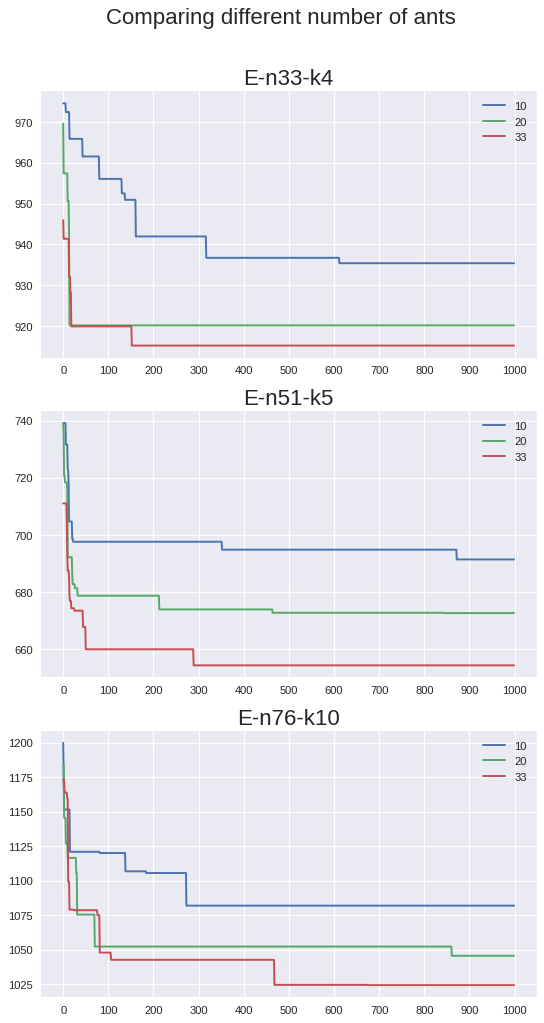

<IPython.core.display.Javascript object>

In [15]:
# with plt.style.context("ggplot"):
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(8, 15), dpi=80, facecolor="w", edgecolor="k"
)
axes = [ax1, ax2, ax3]
for case in case1:
    for task, ax in zip(tasks, axes):
        curr_data = best_score_from_history(task.data[case][1])
        ax.plot(curr_data, label=str(case[1]))
        ax.legend(loc="upper right")
        ax.xaxis.set_ticks(np.arange(0, len(curr_data) + 1, 100))
        ax.set_title(task.name, fontsize=20)

fig.suptitle("Comparing different number of ants", fontsize=20, y=0.95)
# fig.title("Comparing different number of ants")

fig.savefig("ants_baseline.png", dpi=fig.dpi)

## 2. Alphas

In [9]:
case2 = [("baseline", 20, n, 0.25) for n in alphas]

<IPython.core.display.Javascript object>

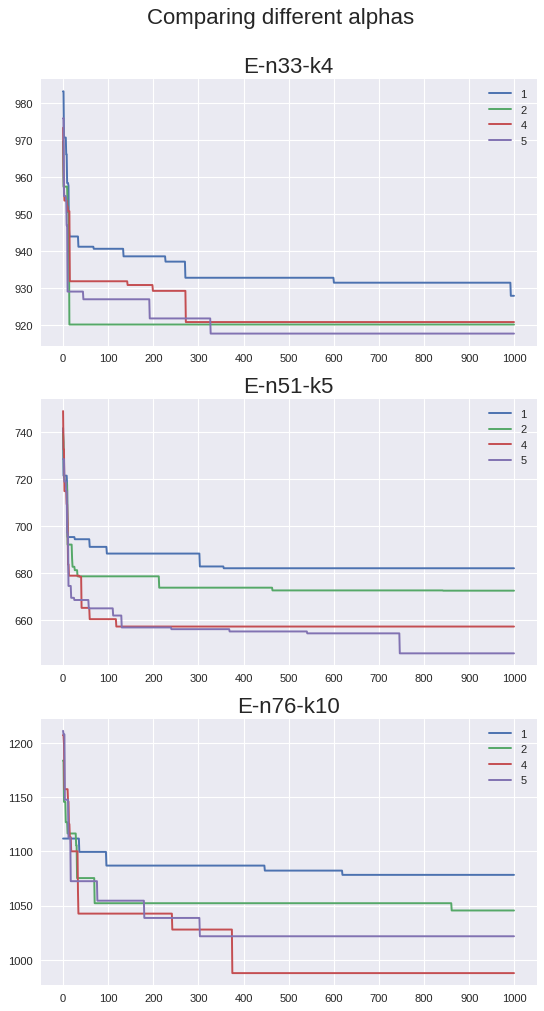

<IPython.core.display.Javascript object>

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(8, 15), dpi=80, facecolor="w", edgecolor="k"
)
axes = [ax1, ax2, ax3]
for case in case2:
    for task, ax in zip(tasks, axes):
        curr_data = best_score_from_history(task.data[case][1])
        ax.plot(curr_data, label=str(case[2]))
        ax.legend(loc="upper right")
        ax.xaxis.set_ticks(np.arange(0, len(curr_data) + 1, 100))
        ax.set_title(task.name, fontsize=20)

fig.suptitle("Comparing different alphas", fontsize=20, y=0.94)
# fig.title("Comparing different number of ants")

fig.savefig("alphas.png", dpi=fig.dpi)